# Numpy-I Notes

## Content

- **Installing and Importing Numpy**

- **Introduction to use case**

- **Motivation: Why to use Numpy? - How is it different from Python Lists?**


- **Creating a Basic Numpy Array** 
    - From a List - `array()`, `shape`, `ndim`
    - From a range and stepsize - `arange()`
    - From a range and count of elements - `linspace()`
    - `type()` ndarray


- **How numpy works under the hood?**

    
- **2-D arrays (Matrices)**
    - `reshape()`
    - Transpose
    - Converting Matrix back to Vector - `flatten()`


- **Creating some special arrays using Numpy**
    - `zeros()`
    - `ones()`
    - `diag()`
    - `identity()`


- **Indexing and Slicing** 
    - Indexing
    - Slicing
    - Masking (Fancy Indexing)


- **Universal Functions (ufunc)**
    - Aggregate Function/ Reduction functions - `sum()`, `mean()`, `min()`, `max()`
    - Logical functions - `any()` , `all()`
    - Sorting function - `sort()`, `argsort()`
    
    
- **Use Case: Fitness Data analysis**
    - Loading data set and EDA using numpy
    - `np.unique()`
    - `argmin()`, `argmax()`






### Installation Using `%pip`

In [ ]:
!pip install numpy

### Importing Numpy

In [3]:
import numpy as np

### Use case Introduction: Fitbit


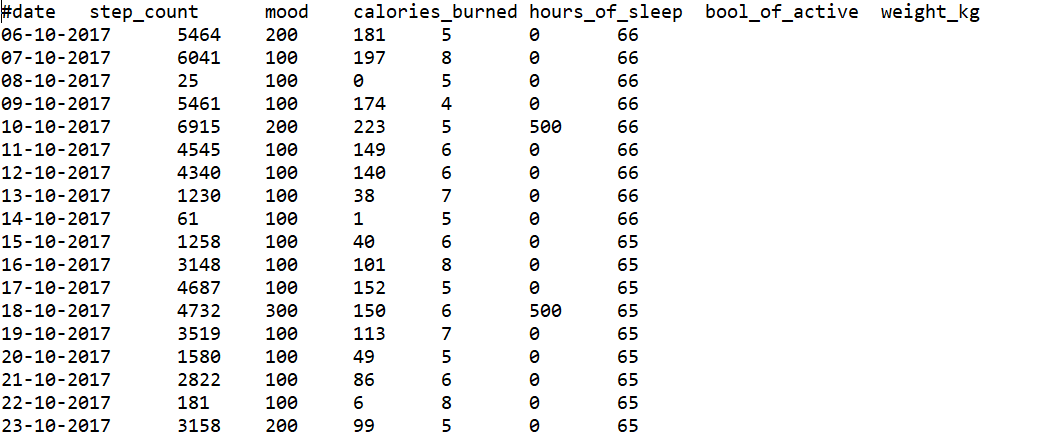


#### Every row is called a record or data point and every column is a feature

#### What kind of questions can we answer using this data?


- How many records and features are there in the dataset?
- What is the **average step count**?
- On which day the **step count was highest/lowest?** 
- What's the **most frequent mood**?

We will try finding 
- How daily activity affects mood? 

### Why use Numpy?

In [2]:
a = [1,2,3,4,5]

In [3]:
a = [i**2 for i in a]
print(a)

[1, 4, 9, 16, 25]


#### Lets try the same operation with NumPy

In [4]:
a = np.array([1,2,3,4,5])
print(a**2)

[ 1  4  9 16 25]


#### But is the clean syntax and ease in writing the only benefit we are getting here?

In [1]:
l = range(1000000)

In [2]:
%timeit [i**3 for i in l]

305 ms ± 8.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
l = np.arange(1000000)

In [5]:
%timeit l**3

2.24 ms ± 77.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Want more examples
l1 = range(10000)
l2 = [i**2 for i in range(10000)]

In [7]:
%timeit list(map(lambda x, y: x*y, l1, l2))

1.32 ms ± 45.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
a1 = np.array(l1)
b1 = np.array(l2)

In [9]:
%timeit a1*b1

9.36 µs ± 568 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)



#### Takeaway ?  

- NumPy provides clean syntax for providing element-wise operations
- Per loop time for numpy to perform operation is much lesser than list



### Basic arrays in NumPy

#### `array()`

In [6]:
# Let's create a 1-D array
arr1 = np.array([1, 2, 3])
print(arr1)
print(arr1 * 2)

[1 2 3]
[2 4 6]


#### What will be the dimension of this array? 

In [7]:
arr1.ndim

1

#### Shape of array


In [8]:
arr1.shape

(3,)

### Sequences in  Numpy 

### From a range and stepsize - `arange()`
- `arange(start, end, step)`

In [11]:
arr2 = np.arange(1, 5)
arr2

array([1, 2, 3, 4])

In [17]:
arr2_stepsize = np.arange(1, 5, 2)
arr2_stepsize

array([1, 3])

- In `np.arange()`, we can pass a **floating point number** as **step-size**

In [18]:
arr3 = np.arange(1, 5, 0.5)
arr3

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

### What if we want to generate equally spaced points? 
=> `linspace()`

In [14]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])



Note: The `end` value is included in the array.


In [16]:
start, end, flag_count = 0, 100, 25
np.linspace(start, end, flag_count)

array([  0.        ,   4.16666667,   8.33333333,  12.5       ,
        16.66666667,  20.83333333,  25.        ,  29.16666667,
        33.33333333,  37.5       ,  41.66666667,  45.83333333,
        50.        ,  54.16666667,  58.33333333,  62.5       ,
        66.66666667,  70.83333333,  75.        ,  79.16666667,
        83.33333333,  87.5       ,  91.66666667,  95.83333333,
       100.        ])


#### Lets check the type of a Numpy array

In [17]:
type(arr1)

numpy.ndarray


### How numpy works under the hood? 

- It's a **Python Library**, we will **write code in Python** to use numpy

#### However, numpy itself is written in C

Allows numpy to **manage memory very efficiently**

#### But why is C arrays more efficient or faster than Python Lists?

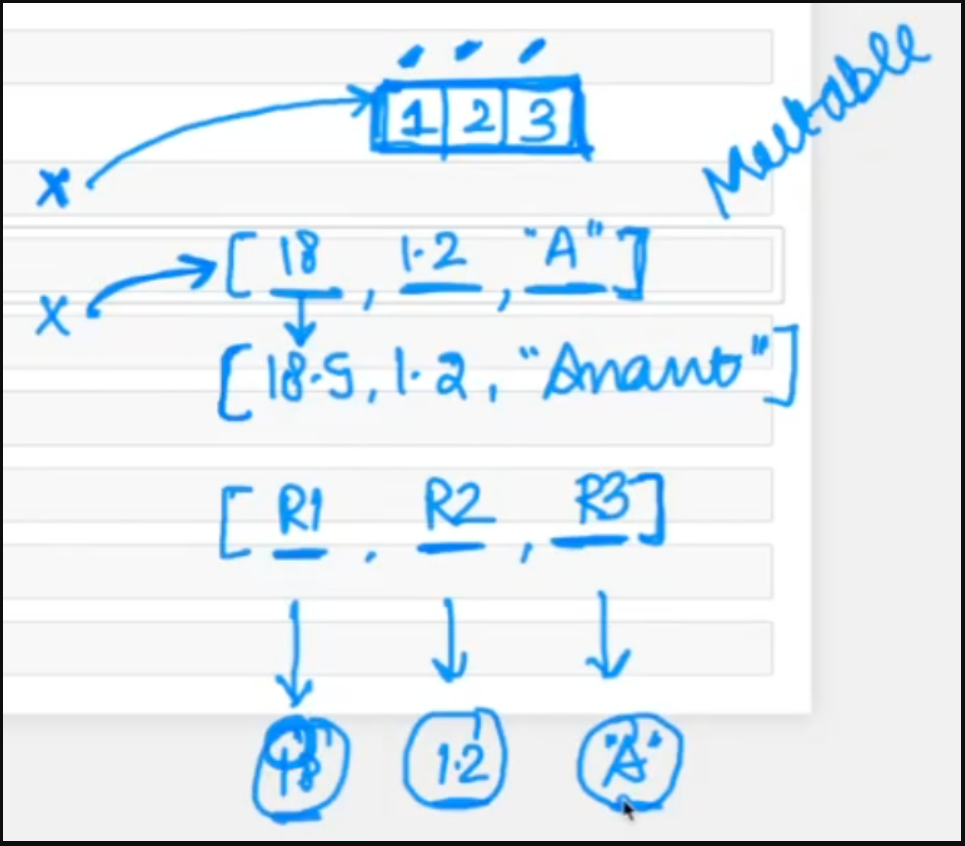

- In **Python List**, we can **store objects of different types together** - int, float, string, etc.
- The **actual values** of objects are **stored somewhere else in the memory** 
- Only **References to those objects** (R1, R2, R3, ...) are stored in the Python List.

- So, when we have to access an element in Python List, we **first access the reference** to that element and then that **reference allows us to access the value** of element stored in memory

#### C array does all this in one step

- **C array stores objects of same data type together**

- **Actual values** are **stored in same contiguous memory**

- So, when we have to access an element in C array, we **access it directly using indices**.

#### This makes NumPy array lose the flexibility to store heterogenous data

==> Unlike Python lists, NumPy array can only hold contigous data

- So numpy arrays are **NOT** really **Python lists**
- They are basically **C arrays**

### C type behaviour of Numpy

In [18]:
arr4 = np.array([1, 2, 3, 4])
arr4

array([1, 2, 3, 4])

In [19]:
arr4 = np.array([1, 2, 3, 4.0])
arr4

array([1., 2., 3., 4.])

- Because **one single C array** can store values of **only one data type** i.e. homogenous data

- We can specify the datatype of array at time of initialization using `dtype` parameter
   
    - ** by default set to `None`**
   

In [20]:
arr5 = np.array([1, 2, 3, 4])
arr5

array([1, 2, 3, 4])

In [21]:
arr5 = np.array([1, 2, 3, 4], dtype="float")
arr5

array([1., 2., 3., 4.])

#### Another way np array behaves like C arrays and not Python lists

- In Python lists, number values can be **arbitrarily large or small**
- There's **usually no overflow of number values**


#### However, in C, C++ and Java, there's overflow of values

- As soon as a **number crosses the max possible** value for a data-type,the number gets **wrapped around to a smaller value**

In [22]:
100**10 # no overflow

100000000000000000000

In [28]:
arr6 = np.array([0, 100])
arr6 ** 10 # 100^10 will overflow

array([         0, 1661992960], dtype=int32)

## Working with 2-D arrays (Matrices)


In [29]:
m1 = np.array([[1,2,3],[4,5,6]])
m1
# Nicely printing out in a Matrix form

array([[1, 2, 3],
       [4, 5, 6]])

How can we check shape of a numpy array?

In [30]:
m1.shape # arr1 has 3 elements

(2, 3)

#### What is the type of this result of `arr1.shape`? Which data structure is this?
Tuple

#### Now, What is the dimension of this array?

In [31]:
m1.ndim

2

### How can we create high dimensional arrays using `reshape()` ?

In [32]:
m2 = np.arange(1, 13)
m2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


#### Can we make `m2` a $4\times4$ array?


In [33]:
m2 = np.arange(1, 13)
m2.reshape(4, 4)

ValueError: cannot reshape array of size 12 into shape (4,4)

#### So, What are the ways in which we can reshape it?

- $4\times3$
- $3\times4$
- $6\times2$
- $2\times6$
- $1\times12$
- $12\times1$

In [34]:
m2 = np.arange(1, 13)
m2.reshape(4, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [42]:
m2 = np.arange(1, 13)
m2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [43]:
m2.shape

(12,)

In [44]:
m2.reshape(12, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [45]:
# no change in original array
m2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


- **`(12,)`** means its a **1D array**
- **`(12, 1)`** means its a **2D array** with 12 rows and 1 column

### Resize

In [48]:
c = np.arange(4)
c.resize((2,2))
c

array([[0, 1],
       [2, 3]])

In [49]:
a = np.arange(4)
a.resize((2,4))
a

array([[0, 1, 2, 3],
       [0, 0, 0, 0]])

####  difference between resize and reshape?

The difference is that it'll add extra zeros to it if shape exceeds number of elements. However, there is a catch: it'll throw an error if array is referenced somewhere and you try resizing it

In [50]:
b = a
a.resize((10,))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

### Transpose

- **Change rows into columns and columns into rows**

In [51]:
a = np.arange(3)
a

array([0, 1, 2])

In [52]:
a.T

array([0, 1, 2])

#### Why did Transpose did not work?

- **numpy sees `a` as a vector (3,), NOT a matrix**.

In [53]:
a = np.arange(3).reshape(1, 3) #reshape vector to a matrix
a
# Now a has dimensions (1, 3) instead of just (3,)
# It has 1 row and 3 columns

array([[0, 1, 2]])

In [54]:
a.T
# It has 3 rows and 1 column

array([[0],
       [1],
       [2]])

### Flattening of an array



In [55]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
A.flatten() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [57]:
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### convert a matrix to 1D array using `reshape()`
#### What should I pass in `A.reshape()` if I want to use it to convert `A` to 1D vector?

- **(1, 1)?** 


In [58]:
A.reshape(1, 1)

ValueError: cannot reshape array of size 12 into shape (1,1)

- So, **(1, 12)?** 

In [59]:
A.reshape(1, 12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

- We need a vector of dimension (12,). So, we need to pass only 1 dimension.

In [60]:
A.reshape(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### What will happen if we pass a negative integer in `reshape()`?

In [61]:
A.reshape(6, -1)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

- Since **no. of elements in our matrix is 12** and **we passed 6 as no. of rows**, it is **able to figure out** that **no. of columns should be 2**



In [62]:
A.reshape(-1, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## Special arrays using Numpy 

####  numpy array with all zeros

In [63]:
np.zeros(3)
# Pass in how many values you need in array
# All values will be zeroes

array([0., 0., 0.])

In [64]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

#### numpy array with all ones

In [65]:
# Just like np.zeroes, but initialize all values to 1
np.ones(3)

array([1., 1., 1.])

In [66]:
# 2D
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

#### Now, do we need `np.twos()`, `np.threes()`, `np.fours()`, .... `np.hundreds()`?

- We can just create array using `np.ones()` and multiply with required value

In [67]:
np.ones((2, 3)) * 5

array([[5., 5., 5.],
       [5., 5., 5.]])

**Datatype** of special arrays

In [68]:
a = np.zeros((2,2))
a

array([[0., 0.],
       [0., 0.]])

In [69]:
a.dtype

dtype('float64')

**It by defaults creates array with dtype float**

#### Diagional matrices

In [70]:
np.diag([1, 2, 3])
# We pass values for diagonal elements as a list
# All other elements are zero

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### Identity matrix
 
**square matrix** where **all diagonal values are 1** and **All non-diagonal values are 0**

In [71]:
np.identity(3)
# Pass in the single dimension of required square identity matrix 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Indexing and Slicing upon Numpy arrays


In [72]:
m1 = np.arange(12)
m1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

### Indexing in np arrays


In [73]:
m1[0] # gives first element of array

0

In [74]:
m1[12] # out of index Error

IndexError: index 12 is out of bounds for axis 0 with size 12

In [75]:
m1 = np.arange(1,10).reshape((3,3))

In [76]:
m1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [77]:
m1[1][2]

6

In [78]:
m1[1, 2] #m1[row, column] (another way of indexing using comma)

6

####  list of indexes in numpy

In [79]:
m1 = np.array([100,200,300,400,500,600])

In [81]:
m1[[2,3,4,1,2,2]]

array([300, 400, 500, 200, 300, 300])

#### List of indexes in 2D array

In [82]:
import numpy as np

In [83]:
m1 = np.arange(9).reshape((3,3))

In [84]:
m1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [85]:
m1[[0,1,2],[0,1,2]] # picking up element (0,0), (1,1) and (2,2)

array([0, 4, 8])

### Slicing


In [86]:
m1 = np.arange(12)
m1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [87]:
m1[:5]

array([0, 1, 2, 3, 4])

#### Can we just get this much of our array `m1`?
```
[[5, 6],
 [9, 10]]
```

#### Remember our `m1` is:
```
m1 = [[0, 1, 2, 3],
      [4, 5, 6, 7],
      [8, 9, 10, 11]]
```

In [88]:
m1 = np.arange(12).reshape(3,4)

In [89]:
# First get rows 1 to all
# Then get columns 1 to 3 (not included)
m1[1:, 1:3]

array([[ 5,  6],
       [ 9, 10]])

#### What if I want this much part?
```
[[2, 3],
 [6, 7],
 [10,11]]
```


In [90]:
# First get all rows
# Then get columns 2 to all

m1[:, 2:]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

#### What if I need 1st and 3rd column?
`
[[1, 3],
 [5, 7],
 [9,11]]
`

In [91]:
# Get all rows
# Then get columns from 1 to all with step of 2

m1[:, 1::2]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [92]:
# Get all rows
# Then get columns 1 and 3

m1[:, (1,3)] #can also pass indices of required columns as a tuple to get the sam result

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

### Fancy indexing (Masking)

- Numpy arrays can be indexed with boolean arrays (masks). 
- It creates copies not views. 



In [93]:
m1 = np.arange(12).reshape(3, 4)
m1 < 6

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False]])

In [94]:
m1[m1 < 6]
# Value corresponding to True is retained
# Value corresponding to False is filtered out

array([0, 1, 2, 3, 4, 5])

In [95]:
m1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [96]:
m1[m1%2 == 0]

array([ 0,  2,  4,  6,  8, 10])

#### **Takeaway?** 

Matrix gets converted into a 1D array after masking because the filtering operation **implicitly converts high-dimensional array into 1D array** as it **cannot retain its $3\times4$ with lesser number of elements**


#### Multiple filter conditions

In [97]:
a = np.arange(11)

In [98]:
a[(a %2 == 0) | (a%5 == 0)] # filter elements which are multiple of 2 or 3

array([ 0,  2,  4,  5,  6,  8, 10])

## Aggregate / Universal Functions (`ufunc`)

#### Numpy universal functions are objects that belongs to `numpy.ufunc` class.

- Some ufuncs are **called automatically when the corresponding "arithmetic operator" is used on arrays**.


#### For example:
- When **addition of two array** is performed **element-wise** using `+` operator, then **np.add() is called internally.**

In [99]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
a+b  # ufunc `np.add()` called automatically

array([ 6,  8, 10, 12])

In [100]:
np.add(a,b)

array([ 6,  8, 10, 12])

### Aggregate Functions/ Reduction functions


#### `np.sum()`

In [101]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [102]:
np.sum(a)  # sums all the values present in array

66

#### We can do row-wise and column-wise sum by setting `axis` parameter

- **`axis = 0` ---> Changes will happen along the vertical axis**
- Summing of values happen **in the vertical direction**


In [103]:
np.sum(a, axis=0)

array([12, 15, 18, 21])

- **`axis = 1` ---> Changes will happen along the horizontal axis**
- Summing of values happen **in the horizontal direction**

In [104]:
np.sum(a, axis=1)

array([ 6, 22, 38])

***



#### `np.mean()`


In [105]:
np.mean(a)

5.5

In [106]:
np.mean(a, axis=0)

array([4., 5., 6., 7.])

In [107]:
np.mean(a, axis=1)

array([1.5, 5.5, 9.5])

#### `np.min()` 

In [108]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [109]:
np.min(a)

0

In [110]:
np.min(a, axis = 1 )

array([0, 4, 8])



#### **`np.max()`** 


In [111]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [112]:
np.max(a) # maximum value

11

In [113]:
np.max(a, axis = 0) # column wise max

array([ 8,  9, 10, 11])

### Logical functions

In [114]:
a = np.array([1,2,3,4])
a

array([1, 2, 3, 4])

#### `np.any()`

- `any()` returns `True` if **any of the elements** in the argument array is **non-zero**.

In [115]:
np.any([True, True, False])

True

In [116]:
a = np.array([1,2,3,4]) # atleast 1 element is non-zero
np.any(a)

True

In [117]:
a = np.array([1,0,0,0]) # atleast 1 element is non-zero
np.any(a)

True

In [118]:
a = np.zeros(4) # all elements are zero
np.any(a)

False


- `any()` returns `True` if **any of the corresponding elements** in the argument arrays follow the **provided condition**.


In [119]:
a = np.array([1,2,3,4])
b = np.array([4,3,2,1])
np.any(a<b) # Atleast 1 element in a < corresponding element in b

True

In [120]:
a = np.array([4,5,6,7])
b = np.array([4,3,2,1])
np.any(a<b) # All elements in a >= corresponding elements in b

False

#### `np.all()`

In [121]:
a = np.array([1,2,3,4])
b = np.array([4,3,2,1])
a, b

(array([1, 2, 3, 4]), array([4, 3, 2, 1]))

In [122]:
np.all(a<b) # Not all elements in a < corresponding elements in b

False

In [123]:
a = np.array([1,0,0,0])
b = np.array([4,3,2,1])
np.all(a<b) # All elements in a < corresponding elements in b

True

#### Multiple conditions for `.all()` function

In [124]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

### Sorting Arrays

- Default axis for sorting is the last axis of the array.



#### `np.sort()`

- Returns a **sorted copy of an array**.

In [125]:
a = np.array([2,30,41,7,17,52])
a

array([ 2, 30, 41,  7, 17, 52])

In [126]:
np.sort(a)

array([ 2,  7, 17, 30, 41, 52])

In [127]:
a

array([ 2, 30, 41,  7, 17, 52])

In [128]:
arr = np.arange(12,0,-1).reshape(4,3)

In [129]:
arr

array([[12, 11, 10],
       [ 9,  8,  7],
       [ 6,  5,  4],
       [ 3,  2,  1]])

In [130]:
np.sort(arr)

array([[10, 11, 12],
       [ 7,  8,  9],
       [ 4,  5,  6],
       [ 1,  2,  3]])

#### `np.argsort()`

- Returns the **indices** that would sort an array.

In [131]:
a = np.array([2,30,41,7,17,52])
a

array([ 2, 30, 41,  7, 17, 52])

In [132]:
np.argsort(a)

array([0, 3, 4, 1, 2, 5], dtype=int64)

## Use Case: Fitness data analysis



In [133]:
!gdown 1kXqcJo4YzmwF1G2BPoA17CI49TZVHANF

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [134]:
data = np.loadtxt('fitness.txt', dtype='str')

In [135]:
data[:5]

array([['06-10-2017', '5464', '200', '181', '5', '0', '66'],
       ['07-10-2017', '6041', '100', '197', '8', '0', '66'],
       ['08-10-2017', '25', '100', '0', '5', '0', '66'],
       ['09-10-2017', '5461', '100', '174', '4', '0', '66'],
       ['10-10-2017', '6915', '200', '223', '5', '500', '66']],
      dtype='<U10')

What's the shape of the data? 

In [136]:
data.shape

(96, 7)

There are 96 records and each record has 7 features.
These features are:
- Date
- Step count
- Mood
- Calories Burned
- Hours of sleep
- activity status
- weight 

In [137]:
data[0]

array(['06-10-2017', '5464', '200', '181', '5', '0', '66'], dtype='<U10')

#### Whats the way to change columns to rows and rows to columns?

Transpose

In [138]:
data.T[0]

array(['06-10-2017', '07-10-2017', '08-10-2017', '09-10-2017',
       '10-10-2017', '11-10-2017', '12-10-2017', '13-10-2017',
       '14-10-2017', '15-10-2017', '16-10-2017', '17-10-2017',
       '18-10-2017', '19-10-2017', '20-10-2017', '21-10-2017',
       '22-10-2017', '23-10-2017', '24-10-2017', '25-10-2017',
       '26-10-2017', '27-10-2017', '28-10-2017', '29-10-2017',
       '30-10-2017', '31-10-2017', '01-11-2017', '02-11-2017',
       '03-11-2017', '04-11-2017', '05-11-2017', '06-11-2017',
       '07-11-2017', '08-11-2017', '09-11-2017', '10-11-2017',
       '11-11-2017', '12-11-2017', '13-11-2017', '14-11-2017',
       '15-11-2017', '16-11-2017', '17-11-2017', '18-11-2017',
       '19-11-2017', '20-11-2017', '21-11-2017', '22-11-2017',
       '23-11-2017', '24-11-2017', '25-11-2017', '26-11-2017',
       '27-11-2017', '28-11-2017', '29-11-2017', '30-11-2017',
       '01-12-2017', '02-12-2017', '03-12-2017', '04-12-2017',
       '05-12-2017', '06-12-2017', '07-12-2017', '08-12

In [143]:
(data.T)

array([['06-10-2017', '07-10-2017', '08-10-2017', '09-10-2017',
        '10-10-2017', '11-10-2017', '12-10-2017', '13-10-2017',
        '14-10-2017', '15-10-2017', '16-10-2017', '17-10-2017',
        '18-10-2017', '19-10-2017', '20-10-2017', '21-10-2017',
        '22-10-2017', '23-10-2017', '24-10-2017', '25-10-2017',
        '26-10-2017', '27-10-2017', '28-10-2017', '29-10-2017',
        '30-10-2017', '31-10-2017', '01-11-2017', '02-11-2017',
        '03-11-2017', '04-11-2017', '05-11-2017', '06-11-2017',
        '07-11-2017', '08-11-2017', '09-11-2017', '10-11-2017',
        '11-11-2017', '12-11-2017', '13-11-2017', '14-11-2017',
        '15-11-2017', '16-11-2017', '17-11-2017', '18-11-2017',
        '19-11-2017', '20-11-2017', '21-11-2017', '22-11-2017',
        '23-11-2017', '24-11-2017', '25-11-2017', '26-11-2017',
        '27-11-2017', '28-11-2017', '29-11-2017', '30-11-2017',
        '01-12-2017', '02-12-2017', '03-12-2017', '04-12-2017',
        '05-12-2017', '06-12-2017', '07-

In [139]:
date, step_count, mood, calories_burned, hours_of_sleep, activity_status, weight = data.T

In [144]:
step_count

array(['5464', '6041', '25', '5461', '6915', '4545', '4340', '1230', '61',
       '1258', '3148', '4687', '4732', '3519', '1580', '2822', '181',
       '3158', '4383', '3881', '4037', '202', '292', '330', '2209',
       '4550', '4435', '4779', '1831', '2255', '539', '5464', '6041',
       '4068', '4683', '4033', '6314', '614', '3149', '4005', '4880',
       '4136', '705', '570', '269', '4275', '5999', '4421', '6930',
       '5195', '546', '493', '995', '1163', '6676', '3608', '774', '1421',
       '4064', '2725', '5934', '1867', '3721', '2374', '2909', '1648',
       '799', '7102', '3941', '7422', '437', '1231', '1696', '4921',
       '221', '6500', '3575', '4061', '651', '753', '518', '5537', '4108',
       '5376', '3066', '177', '36', '299', '1447', '2599', '702', '133',
       '153', '500', '2127', '2203'], dtype='<U10')

In [145]:
step_count.dtype

dtype('<U10')

#### Because Numpy type-casted all the data to strings. It's a string type where **U** means Unicode String. and 10 means 10 bytes. 



**Step Count**

In [146]:
step_count = np.array(step_count, dtype = 'int')
step_count.dtype

dtype('int32')

In [147]:
step_count

array([5464, 6041,   25, 5461, 6915, 4545, 4340, 1230,   61, 1258, 3148,
       4687, 4732, 3519, 1580, 2822,  181, 3158, 4383, 3881, 4037,  202,
        292,  330, 2209, 4550, 4435, 4779, 1831, 2255,  539, 5464, 6041,
       4068, 4683, 4033, 6314,  614, 3149, 4005, 4880, 4136,  705,  570,
        269, 4275, 5999, 4421, 6930, 5195,  546,  493,  995, 1163, 6676,
       3608,  774, 1421, 4064, 2725, 5934, 1867, 3721, 2374, 2909, 1648,
        799, 7102, 3941, 7422,  437, 1231, 1696, 4921,  221, 6500, 3575,
       4061,  651,  753,  518, 5537, 4108, 5376, 3066,  177,   36,  299,
       1447, 2599,  702,  133,  153,  500, 2127, 2203])

**Calories Burned**

In [148]:
calories_burned = np.array(calories_burned, dtype = 'int')
calories_burned.dtype

dtype('int32')

**Hours of Sleep**

In [149]:
hours_of_sleep = np.array(hours_of_sleep, dtype = 'int')
hours_of_sleep.dtype

dtype('int32')

**Weight**

In [150]:
weight = np.array(weight, dtype = 'int')
weight.dtype

dtype('int32')

**Mood**

`Mood` is a categorical data type

In [151]:
mood

array(['200', '100', '100', '100', '200', '100', '100', '100', '100',
       '100', '100', '100', '300', '100', '100', '100', '100', '200',
       '200', '200', '200', '200', '200', '300', '200', '300', '300',
       '300', '300', '300', '300', '300', '200', '300', '300', '300',
       '300', '300', '300', '300', '300', '300', '300', '200', '300',
       '300', '300', '300', '300', '300', '300', '300', '300', '200',
       '100', '300', '300', '300', '300', '300', '300', '300', '100',
       '200', '200', '100', '100', '200', '200', '300', '200', '200',
       '100', '200', '100', '200', '200', '100', '100', '100', '100',
       '300', '200', '300', '200', '100', '100', '100', '200', '200',
       '100', '100', '300', '200', '200', '300'], dtype='<U10')

In [152]:
np.unique(mood)

array(['100', '200', '300'], dtype='<U10')

In [153]:
mood[mood == '300'] = 'Happy'

In [154]:
mood[mood == '200'] = 'Neutral'

In [155]:
mood[mood == '100'] = 'Sad'

In [156]:
mood

array(['Neutral', 'Sad', 'Sad', 'Sad', 'Neutral', 'Sad', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Sad', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Neutral', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Neutral',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Neutral', 'Sad', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Happy', 'Happy', 'Sad', 'Neutral', 'Neutral',
       'Sad', 'Sad', 'Neutral', 'Neutral', 'Happy', 'Neutral', 'Neutral',
       'Sad', 'Neutral', 'Sad', 'Neutral', 'Neutral', 'Sad', 'Sad', 'Sad',
       'Sad', 'Happy', 'Neutral', 'Happy', 'Neutral', 'Sad', 'Sad', 'Sad',
       'Neutral', 'Neutral', 'Sad', 'Sad', 'Happy', 'Neutral', 'Neutral',
       'Happy'], dtype='<U10')

**Activity Status**

Here 0 means Feeling of inactiveness

500 means Feeling of activeness

In [157]:
activity_status

array(['0', '0', '0', '0', '500', '0', '0', '0', '0', '0', '0', '0',
       '500', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '500', '0', '0', '0', '0', '500', '0', '0', '0', '0', '0', '500',
       '500', '500', '500', '500', '500', '500', '500', '500', '0', '0',
       '0', '0', '0', '0', '500', '500', '500', '500', '500', '500',
       '500', '500', '500', '500', '500', '500', '0', '500', '500', '0',
       '500', '500', '500', '500', '500', '0', '500', '500', '500', '500',
       '0', '0', '0', '0', '500', '500', '500', '500', '0', '0', '0', '0',
       '0', '0', '0', '0', '500', '0', '500'], dtype='<U10')

In [158]:
activity_status[activity_status == '500'] = 'Active'
activity_status[activity_status == '0'] = 'Inactive'

In [159]:
activity_status

array(['Inactive', 'Inactive', 'Inactive', 'Inactive', 'Active',
       'Inactive', 'Inactive', 'Inactive', 'Inactive', 'Inactive',
       'Inactive', 'Inactive', 'Active', 'Inactive', 'Inactive',
       'Inactive', 'Inactive', 'Inactive', 'Inactive', 'Inactive',
       'Inactive', 'Inactive', 'Inactive', 'Inactive', 'Inactive',
       'Active', 'Inactive', 'Inactive', 'Inactive', 'Inactive', 'Active',
       'Inactive', 'Inactive', 'Inactive', 'Inactive', 'Inactive',
       'Active', 'Active', 'Active', 'Active', 'Active', 'Active',
       'Active', 'Active', 'Active', 'Inactive', 'Inactive', 'Inactive',
       'Inactive', 'Inactive', 'Inactive', 'Active', 'Active', 'Active',
       'Active', 'Active', 'Active', 'Active', 'Active', 'Active',
       'Active', 'Active', 'Active', 'Inactive', 'Active', 'Active',
       'Inactive', 'Active', 'Active', 'Active', 'Active', 'Active',
       'Inactive', 'Active', 'Active', 'Active', 'Active', 'Inactive',
       'Inactive', 'Inactive', 'Inacti

### EDA: Insights from the data.

#### What's the average step count? 

In [160]:
step_count.mean()

2935.9375

#### On which day the step count was highest?

In [161]:
step_count.argmax()


69

In [162]:
date[step_count.argmax()]

'14-12-2017'

Let's check the calorie burnt on the day

In [164]:
calories_burned[step_count.argmax()]

243

Let's try to get the number of steps on that day as well

In [165]:
step_count.max()

7422

#### What's the most frequent mood ? 

One approach is for each of the category we get count of record and see which one is the highest

In [166]:
mood[mood == 'Sad'].shape

(29,)

In [167]:
mood[mood == 'Neutral'].shape

(27,)

In [168]:
mood[mood == 'Happy'].shape

(40,)

Another approach: 

In [169]:
np.unique(mood)

array(['Happy', 'Neutral', 'Sad'], dtype='<U10')

We can get the count by passing in the parameter `return_counts = True`

In [170]:
np.unique(mood, return_counts = True)

(array(['Happy', 'Neutral', 'Sad'], dtype='<U10'),
 array([40, 27, 29], dtype=int64))

The most frequent mood is Happy :)

#### Comparing step counts on bad mood days and good mood days

**Average step count on Sad mood days**

In [171]:
np.mean(step_count[mood == 'Sad'])

2103.0689655172414

In [172]:
np.sort(step_count[mood == 'Sad'])

array([  25,   36,   61,  133,  177,  181,  221,  299,  518,  651,  702,
        753,  799, 1230, 1258, 1580, 1648, 1696, 2822, 3148, 3519, 3721,
       4061, 4340, 4545, 4687, 5461, 6041, 6676])

In [173]:
np.std(step_count[mood == 'Sad'])

2021.2355035376254

**Average step count on happy days**

In [174]:
np.mean(step_count[mood == 'Happy'])

3392.725

In [175]:
np.sort(step_count[mood == 'Happy'])

array([ 153,  269,  330,  493,  539,  546,  614,  705,  774,  995, 1421,
       1831, 1867, 2203, 2255, 2725, 3149, 3608, 4005, 4033, 4064, 4068,
       4136, 4275, 4421, 4435, 4550, 4683, 4732, 4779, 4880, 5195, 5376,
       5464, 5537, 5934, 5999, 6314, 6930, 7422])

Average step count on sad days - 2103.

Average step count on happy days - 3392

**There may be relation between mood and step count**

#### Let's try to check inverse. Mood when step count was greater/lesser

**Mood when step count > 4000**

In [176]:
np.unique(mood[step_count > 4000], return_counts = True)

(array(['Happy', 'Neutral', 'Sad'], dtype='<U10'),
 array([22,  9,  7], dtype=int64))

Out of 38 days when step count was more than 4000, user was feeling happy on 22 days.

**Mood when step count <= 2000**

In [177]:
np.unique(mood[step_count < 2000], return_counts = True)

(array(['Happy', 'Neutral', 'Sad'], dtype='<U10'),
 array([13,  8, 18], dtype=int64))

Out of 39 days, when step count was less than 2000, user was feeling sad on 18 days.

#### **There may be a correlation between Mood and step count**